# Review questions
Here we analyse some of the relationships used in our Lagrangian model.

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [5]:
datadir = '/Users/rfische1/Documents/UU/'
         #'/data/oceanparcels/output_data/data_Delphine/' 
         #'/nethome/lobel001/biofouling_3dtransport_2/Simulation/Sim_output/' 
         #/data/oceanparcels/output_data/data_Reint/'

## Respiration - temperature dependence

In [2]:
T = np.linspace(0, 30)
q10 = 2
r20 = 0.1 / 86400.

Aresp = (q10 ** ((T - 20.) / 10.)) * r20

In [3]:
regions = {'EqPac': 'Equatorial Pacific',
           'GPGP': 'Great Pacific Garbage Patch',
           'SO': 'Southern Ocean',
           'NPSG': 'North Pacific Subtropical Gyre'}
region = ['EqPac','NPSG', 'SO']
region_cmap = ['teal', 'darkorange', '#9AE19D']

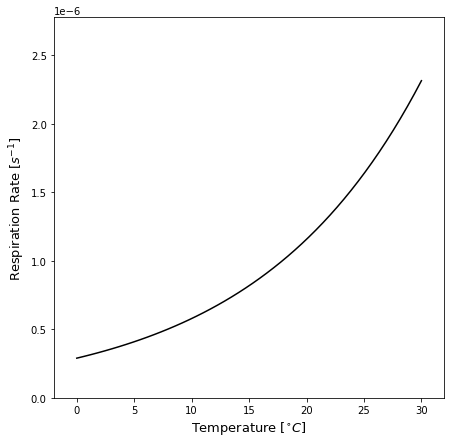

In [6]:
fig = plt.figure(figsize=(7,7))
ax = plt.axes()
ax.plot(T,Aresp, color='k')
ax.set_xlabel(r'Temperature [$^{\circ}C$]', fontsize=13)
ax.set_ylabel('Respiration Rate [$s^{-1}$]', fontsize=13)
ax.set_ylim(0,np.max(Aresp)*1.2)
ax.set_xlim(-2, 32)

### RANGES ###
# ax.vlines([25,30],[0,0],[Aresp[np.abs(T-25).argmin()],Aresp[np.abs(T-30).argmin()]], colors=region_cmap[0], label=regions[region[0]])
# ax.fill_between(T[np.abs(T-25).argmin():np.abs(T-30).argmin()+1],Aresp[np.abs(T-25).argmin():np.abs(T-30).argmin()+1], color=region_cmap[0], alpha=0.3)
# ax.hlines([Aresp[np.abs(T-25).argmin()],Aresp[np.abs(T-30).argmin()]], [-3, -3], [25,30], colors=region_cmap[0])
# ax.fill_betweenx(Aresp[np.abs(T-25).argmin():np.abs(T-30).argmin()+1], T[np.abs(T-25).argmin():np.abs(T-30).argmin()+1], np.ones(T[np.abs(T-25).argmin():np.abs(T-30).argmin()+1].shape)*-3, color=region_cmap[0], alpha=0.3)

# ax.vlines([12,22],[0,0],[Aresp[np.abs(T-12).argmin()],Aresp[np.abs(T-22).argmin()]], colors=region_cmap[1], label=regions[region[1]])
# ax.fill_between(T[np.abs(T-12).argmin():np.abs(T-22).argmin()+1],Aresp[np.abs(T-12).argmin():np.abs(T-22).argmin()+1], color=region_cmap[1], alpha=0.3)
# ax.hlines([Aresp[np.abs(T-12).argmin()],Aresp[np.abs(T-22).argmin()]], [-3, -3], [12,22], colors=region_cmap[1])
# ax.fill_betweenx(Aresp[np.abs(T-12).argmin():np.abs(T-22).argmin()+1], T[np.abs(T-12).argmin():np.abs(T-22).argmin()+1], np.ones(T[np.abs(T-12).argmin():np.abs(T-22).argmin()+1].shape)*-3, color=region_cmap[1], alpha=0.3)

# ax.vlines([0,8],[0,0],[Aresp[np.abs(T-0).argmin()],Aresp[np.abs(T-8).argmin()]], colors=region_cmap[2], label=regions[region[2]])
# ax.fill_between(T[np.abs(T-0).argmin():np.abs(T-8).argmin()+1],Aresp[np.abs(T-0).argmin():np.abs(T-8).argmin()+1], color=region_cmap[2], alpha=0.3)
# ax.hlines([Aresp[np.abs(T-0).argmin()],Aresp[np.abs(T-8).argmin()]], [-3, -3], [0,8], colors=region_cmap[2])
# ax.fill_betweenx(Aresp[np.abs(T-0).argmin():np.abs(T-8).argmin()+1], T[np.abs(T-0).argmin():np.abs(T-8).argmin()+1], np.ones(T[np.abs(T-0).argmin():np.abs(T-8).argmin()+1].shape)*-3, color=region_cmap[2], alpha=0.3)

# ax.legend()
plt.savefig(datadir+'resprate_temp')

#### Respiration coefficient difference factor 2, 4 respectively

#### da/dt = - Aresp * a

#### a(t) = e^(-Aresp * t)

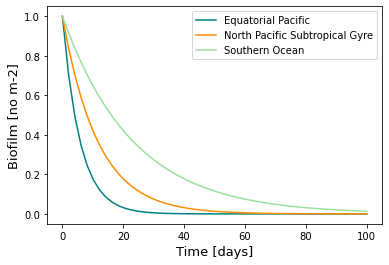

In [5]:
t= np.linspace(0,1e2)
A0 = 2e-6   # s-1
A1 = 1e-6   # s-1
A2 = 0.5e-6 # s-1
a0 = np.exp(-A0*86400*t)
a1 = np.exp(-A1*86400*t)
a2 = np.exp(-A2*86400*t)
plt.plot(t,a0, color=region_cmap[0], label=regions[region[0]])
plt.plot(t,a1, color=region_cmap[1], label=regions[region[1]])
plt.plot(t,a2, color=region_cmap[2], label=regions[region[2]])
plt.xlabel('Time [days]', fontsize=13)
plt.ylabel('Biofilm [no m-2]', fontsize=13)
plt.legend()

## Settling velocity - seawater density dependence

In [6]:
def vs_rhosw(r_tot, rho_tot, rho_sw, kin_visc):
    g=9.81
    
    dn=2. * (r_tot)
    delta_rho = (rho_tot - rho_sw) / rho_sw  # normalised difference in density between total plastic+bf and seawater[-]
    dstar = ((rho_tot - rho_sw) * g * dn ** 3.) / (rho_sw * kin_visc ** 2.)  # [-]

    w=np.zeros(dstar.shape)
    w[dstar > 5e9] = 1000.
    w[dstar < 0.05] = (dstar[dstar < 0.05] ** 2.) * 1.71E-4
    w[np.logical_and(dstar>0.05,dstar<5e9)] = 10. ** (-3.76715 
                                                   + (1.92944 * np.log10(dstar[np.logical_and(dstar>0.05,dstar<5e9)])) 
                                                      - (0.09815 * np.log10(dstar[np.logical_and(dstar>0.05,dstar<5e9)]) ** 2.) 
                                                      - (0.00575 * np.log10(dstar[np.logical_and(dstar>0.05,dstar<5e9)]) ** 3.)
                                                      + (0.00056 * np.log10(dstar[np.logical_and(dstar>0.05,dstar<5e9)]) ** 4.))
    # ------ Settling of particle -----
    vs = np.zeros(dstar.shape)
    vs[delta_rho > 0] = (g * kin_visc * w[delta_rho > 0] * delta_rho[delta_rho > 0]) ** (1. / 3.)
    a_del_rho = delta_rho * -1.
    vs[delta_rho<=0] = -1. * (g * kin_visc * w[delta_rho<=0] * a_del_rho[delta_rho<=0]) ** (1. / 3.)  # m s-1
    
    return vs

In [7]:
r_tot = [1e-5, 1e-4, 1e-3]
rho_tot = [920, 1040, 1170]
rho_sw = np.linspace(1020, 1026)
kin_visc=1e-6
vs_0 = vs_rhosw(r_tot=r_tot[0], rho_tot=920, rho_sw=rho_sw, kin_visc=kin_visc)
vs_1 = vs_rhosw(r_tot=r_tot[1], rho_tot=920, rho_sw=rho_sw, kin_visc=kin_visc)
vs_2 = vs_rhosw(r_tot=r_tot[2], rho_tot=920, rho_sw=rho_sw, kin_visc=kin_visc)
vs_3 = vs_rhosw(r_tot=r_tot[0], rho_tot=1040, rho_sw=rho_sw, kin_visc=kin_visc)
vs_4 = vs_rhosw(r_tot=r_tot[1], rho_tot=1040, rho_sw=rho_sw, kin_visc=kin_visc)
vs_5 = vs_rhosw(r_tot=r_tot[2], rho_tot=1040, rho_sw=rho_sw, kin_visc=kin_visc)
vs_6 = vs_rhosw(r_tot=r_tot[0], rho_tot=1170, rho_sw=rho_sw, kin_visc=kin_visc)
vs_7 = vs_rhosw(r_tot=r_tot[1], rho_tot=1170, rho_sw=rho_sw, kin_visc=kin_visc)
vs_8 = vs_rhosw(r_tot=r_tot[2], rho_tot=1170, rho_sw=rho_sw, kin_visc=kin_visc)
vslist = [[vs_0, vs_1, vs_2], [vs_3, vs_4, vs_5], [vs_6, vs_7, vs_8]]

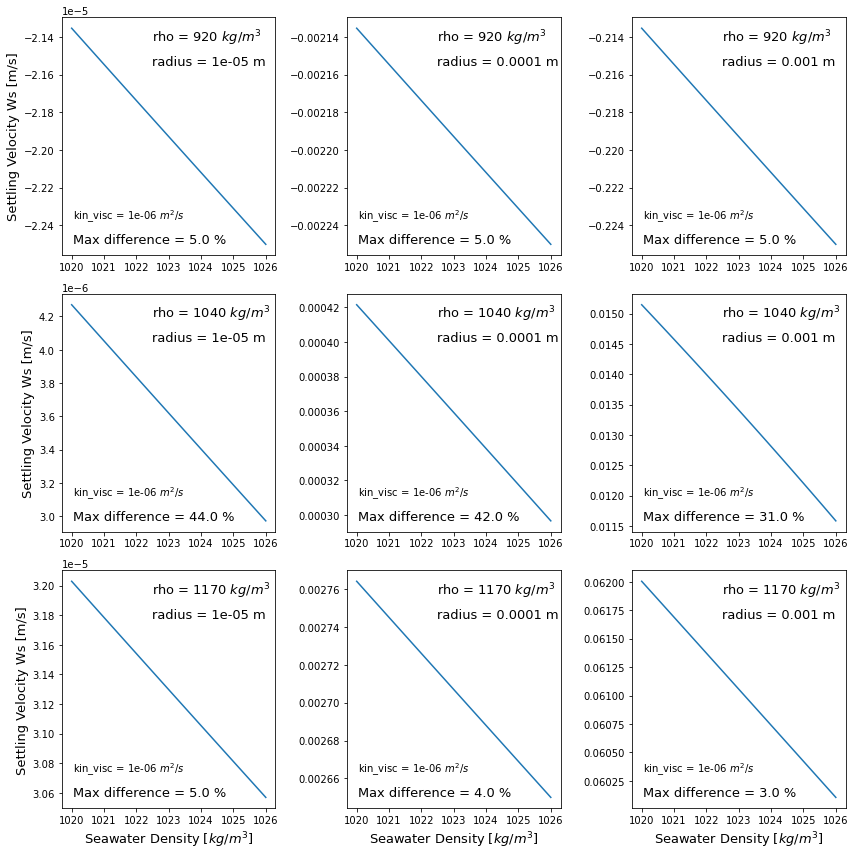

In [8]:
fig = plt.figure(figsize=(12,12), tight_layout=True)
gs = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)

ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[0, 2])
ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 1])
ax5 = fig.add_subplot(gs[1, 2])
ax6 = fig.add_subplot(gs[2, 0])
ax7 = fig.add_subplot(gs[2, 1])
ax8 = fig.add_subplot(gs[2, 2])

axes = [[ax0, ax1, ax2],[ax3, ax4, ax5],[ax6, ax7, ax8]]

for i, ax_r in enumerate(axes):
    for j, ax in enumerate(ax_r):
        ax.plot(rho_sw,vslist[i][j])
        if i == 2:
            ax.set_xlabel(r'Seawater Density [$kg/m^3$]', fontsize=13)
        if j == 0:
            ax.set_ylabel('Settling Velocity Ws [m/s]', fontsize=13)
        ax.text(0.42,0.8, f'radius = {r_tot[j]} m', fontsize=13,transform=ax.transAxes)
        ax.text(0.42,0.9, fr'rho = {rho_tot[i]} $kg/m^3$', fontsize=13,transform=ax.transAxes)
        ax.text(0.05,0.15, fr'kin_visc = {kin_visc} $m^2/s$',transform=ax.transAxes)
        ax.text(0.05,0.05, f'Max difference = {np.round((np.max(vslist[i][j])-np.min(vslist[i][j]))/np.abs(np.min(vslist[i][j]))*100)} %', fontsize=13,transform=ax.transAxes)

#### Time until sinking increases with increased sw density - max velocity change 44 %

#### Oscillating pattern more dependent on stratification than initial sw density